In [1]:
import torch
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt

from utils import get_transforms
from utils import download_and_get_data
from model import Net, train, test

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

In [3]:

train_transforms = get_transforms(train=True)
test_transforms = get_transforms(train=False)

In [4]:

train_data = download_and_get_data(train=True)
test_data = download_and_get_data(train=False)

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

torch.Size([512, 1, 28, 28]) torch.Size([512])


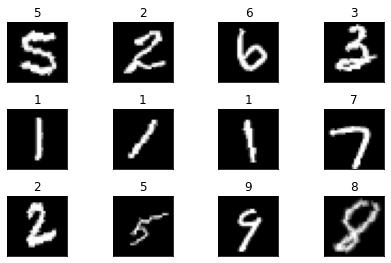

In [6]:


batch_data, batch_label = next(iter(train_loader)) 
print(batch_data.shape,batch_label.shape)
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.1429 Batch_id=117 Accuracy=23.37: 100%|██████████| 118/118 [04:40<00:00,  2.37s/it]


Test set: Average loss: 2.1317, Accuracy: 2946/10000 (29.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1791 Batch_id=117 Accuracy=63.81: 100%|██████████| 118/118 [04:30<00:00,  2.29s/it]


Test set: Average loss: 0.1754, Accuracy: 9497/10000 (94.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1037 Batch_id=117 Accuracy=94.19: 100%|██████████| 118/118 [04:50<00:00,  2.47s/it]


Test set: Average loss: 0.0928, Accuracy: 9719/10000 (97.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0237 Batch_id=117 Accuracy=96.15: 100%|██████████| 118/118 [04:02<00:00,  2.05s/it]


Test set: Average loss: 0.0613, Accuracy: 9802/10000 (98.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0796 Batch_id=117 Accuracy=96.98: 100%|██████████| 118/118 [04:01<00:00,  2.04s/it]


Test set: Average loss: 0.0526, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1430 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [03:35<00:00,  1.83s/it]


Test set: Average loss: 0.0461, Accuracy: 9849/10000 (98.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0822 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [03:24<00:00,  1.74s/it]


Test set: Average loss: 0.0399, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0781 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [03:20<00:00,  1.70s/it]


Test set: Average loss: 0.0367, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0410 Batch_id=117 Accuracy=97.99: 100%|██████████| 118/118 [03:16<00:00,  1.67s/it]


Test set: Average loss: 0.0342, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0221 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [03:17<00:00,  1.67s/it]


Test set: Average loss: 0.0289, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0217 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [03:58<00:00,  2.02s/it]


Test set: Average loss: 0.0325, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1395 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [04:30<00:00,  2.29s/it]


Test set: Average loss: 0.0278, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0825 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [04:29<00:00,  2.28s/it]


Test set: Average loss: 0.0269, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1072 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [04:55<00:00,  2.50s/it]


Test set: Average loss: 0.0240, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0469 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [04:32<00:00,  2.31s/it]


Test set: Average loss: 0.0248, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0267 Batch_id=34 Accuracy=98.82:  30%|██▉       | 35/118 [01:24<03:26,  2.49s/it]